## Title to be...

## Considering the 3 datasets:
 -   PISA ("Program for International Student Assessment")
 -   World Development Indicators
 -   Hapiness Dataset
 

# First DataSet PISA:

PISA stands for "Program for International Student Assessment" and it is applied to 15 year-old students across the world to assess their performance in Math, Reading and Science. These are the 2015 scores.

Link to the data set
https://www.kaggle.com/zazueta/pisa-scores-2015/downloads/Pisa%20mean%20performance%20scores%202013%20-%202015%20Definition%20and%20Source.csv




In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')


In [2]:
PISA = pd.read_csv('/home/dio/Coursera_Python/dati/PISAData.csv', nrows=1161)
PISA=PISA[['Country Name','Series Name','2015 [YR2015]']]
PISA.columns=['Country','Series','Score_2015']
PISA['Score_2015'][PISA['Score_2015']=='..']=np.NaN
PISA['Score_2015']=PISA['Score_2015'].astype(float)

PISA=PISA.pivot_table(index=['Country'],columns=['Series'],values=['Score_2015'])

names2=['mathematics','mathematics_Female','mathematics_Male','reading','reading_Female','reading_Male','science','science_Female','science_Male']
PISA.columns=names2
PISA=PISA.reset_index()



In [3]:
PISA.corr()

,mathematics,mathematics_Female,mathematics_Male,reading,reading_Female,reading_Male,science,science_Female,science_Male
mathematics,1.000000,0.996050,0.996220,0.944694,0.938286,0.936269,0.975159,0.968043,0.969146
mathematics_Female,0.996050,1.000000,0.984587,0.934626,0.937750,0.917764,0.969118,0.971142,0.954710
mathematics_Male,0.996220,0.984587,1.000000,0.946920,0.931268,0.946808,0.973600,0.957648,0.975821
reading,0.944694,0.934626,0.946920,1.000000,0.990635,0.992314,0.963816,0.948941,0.965100
reading_Female,0.938286,0.937750,0.931268,0.990635,1.000000,0.966321,0.956005,0.955596,0.944049
reading_Male,0.936269,0.917764,0.946808,0.992314,0.966321,1.000000,0.956038,0.928381,0.969292
science,0.975159,0.969118,0.973600,0.963816,0.956005,0.956038,1.000000,0.992877,0.993877
science_Female,0.968043,0.971142,0.957648,0.948941,0.955596,0.928381,0.992877,1.000000,0.973654
science_Male,0.969146,0.954710,0.975821,0.965100,0.944049,0.969292,0.993877,0.973654,1.000000


## Created two new features, from the 9 metrixes since they are extremelly correlate.
- PISA_average_country Average of the 3 subjects
- Delta Male-Female/PISA_average_country

In [4]:
PISA['PISA_average_country']=(PISA['mathematics']+PISA['reading']+PISA['science'])/3.0
PISA['Delta_Male-Female']=PISA['mathematics_Male']-PISA['mathematics_Female']+PISA['reading_Male']-PISA['reading_Female']+PISA['science_Male']-PISA['science_Female']
PISA=PISA[['Country','PISA_average_country','Delta_Male-Female']]
PISA=PISA.dropna()
PISA.head()

,Country,PISA_average_country,Delta_Male-Female
0,Albania,415.213600,-92.570316
1,Algeria,361.736867,-51.785809
2,Argentina,422.187533,17.061451
4,Australia,502.263567,-23.776820
5,Austria,492.215133,25.580473


<IPython.core.display.Javascript object>


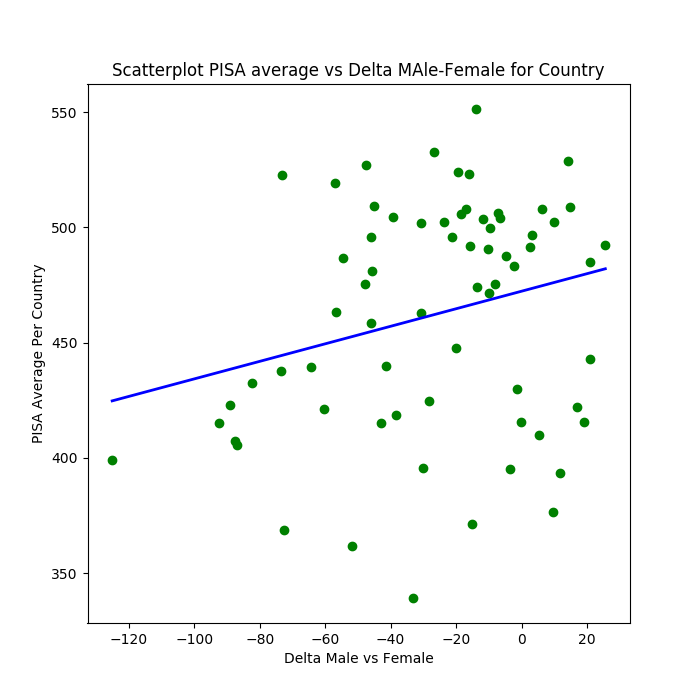

In [5]:
# Define regression parameter 
a, b = np.polyfit(np.array(PISA['Delta_Male-Female']), np.array(PISA['PISA_average_country']), deg=1)
f = lambda x: a * x + b

plt.figure(figsize=(7,7))
plt.scatter(PISA['Delta_Male-Female'],PISA['PISA_average_country'],c='green')

x = np.array([min(PISA['Delta_Male-Female']),max(PISA['Delta_Male-Female'])])
plt.plot(x,f(x),lw=2, c="blue",label="Regression line")
plt.title("Scatterplot PISA average vs Delta MAle-Female for Country")
plt.xlabel('Delta Male vs Female')
plt.ylabel('PISA Average Per Country')
plt.show()


# Second Dataset
# World Development Indicators importing

- IT.NET.USER.P2     [2014] --> Internet users (per 100 people)
- NY.GDP.PCAP.CD     [2013]-->  GDP per capita (current USdollar) 
- SE.ADT.LITR.FE.ZS  [2014] --> Adult literacy rate, population 15+ years, female (%)
- SE.ADT.LITR.MA.ZS  [2014] --> Adult literacy rate, population 15+ years, male (%)
- SE.ADT.LITR.ZS     [2014] --> Adult literacy rate, population 15+ years, both sexes (%)
- SE.XPD.CTOT.ZS     [2014] --> Current education expenditure, total (% of total expenditure in public institutions)
- SG.VAW.REFU.ZS     [2014] --> Women who believe a husband is justified in beating his wife when she refuses sex with him (%)
- SG.VAW.BURN.ZS     [2014] --> Women who believe a husband is justified in beating his wife when she burns the food (%)
- SP.DYN.IMRT.IN     [2015] --> Mortality rate, infant (per 1,000 live births)

In [2]:
WordInds = pd.read_csv('/home/dio/Coursera_Python/dati/Indicators.csv')
#first selection of columns
WordInds=WordInds[['CountryName','IndicatorCode','Year','Value']]
#Filter for one year...
WordInds=WordInds[WordInds['Year']==2013]

#Select the indicators of interest
indicators=['IT.NET.USER.P2','NY.GDP.PCAP.CD','SE.ADT.LITR.FE.ZS','SE.ADT.LITR.MA.ZS','SE.ADT.LITR.ZS',
            'SG.VAW.REFU.ZS','SP.DYN.IMRT.IN']

WordInds=WordInds[WordInds['IndicatorCode'].isin(indicators)]
#expand the colum indicatorCode into a wide table..
WordInds=WordInds.pivot_table(index=['CountryName'],columns=['IndicatorCode'],values=['Value'])
#Rename the colummns
colonne=['InternetUsr','GDPPerCapita','AdultLitFem','AdultLiMal','AdultLit',
         'WomenWBelieve','MortaInfant']
WordInds.columns=colonne
WordInds['AdulDelta']=WordInds['AdultLiMal']-WordInds['AdultLitFem']

#colonne=['InternetUsr','GDPPerCapita','AdultLitFem','AdultLiMal','AdultLit',
#         'WomenWBelieve','MortaInfant']
#WordInds.columns=colonne

#Extract teh Country name from the Index
WordInds=WordInds.reset_index()  
WordInds.head()

,CountryName,InternetUsr,GDPPerCapita,AdultLitFem,AdultLiMal,AdultLit,WomenWBelieve,MortaInfant,AdulDelta
0,Afghanistan,5.9,666.795051,NaN,NaN,NaN,NaN,69.9,NaN
1,Albania,57.2,4411.258241,NaN,NaN,NaN,NaN,13.3,NaN
2,Algeria,16.5,5491.614414,NaN,NaN,NaN,NaN,22.1,NaN
3,Andorra,94.0,42806.522553,NaN,NaN,NaN,NaN,2.2,NaN
4,Angola,19.1,5900.529570,59.671429,82.323273,70.778412,NaN,101.4,22.651844


<IPython.core.display.Javascript object>


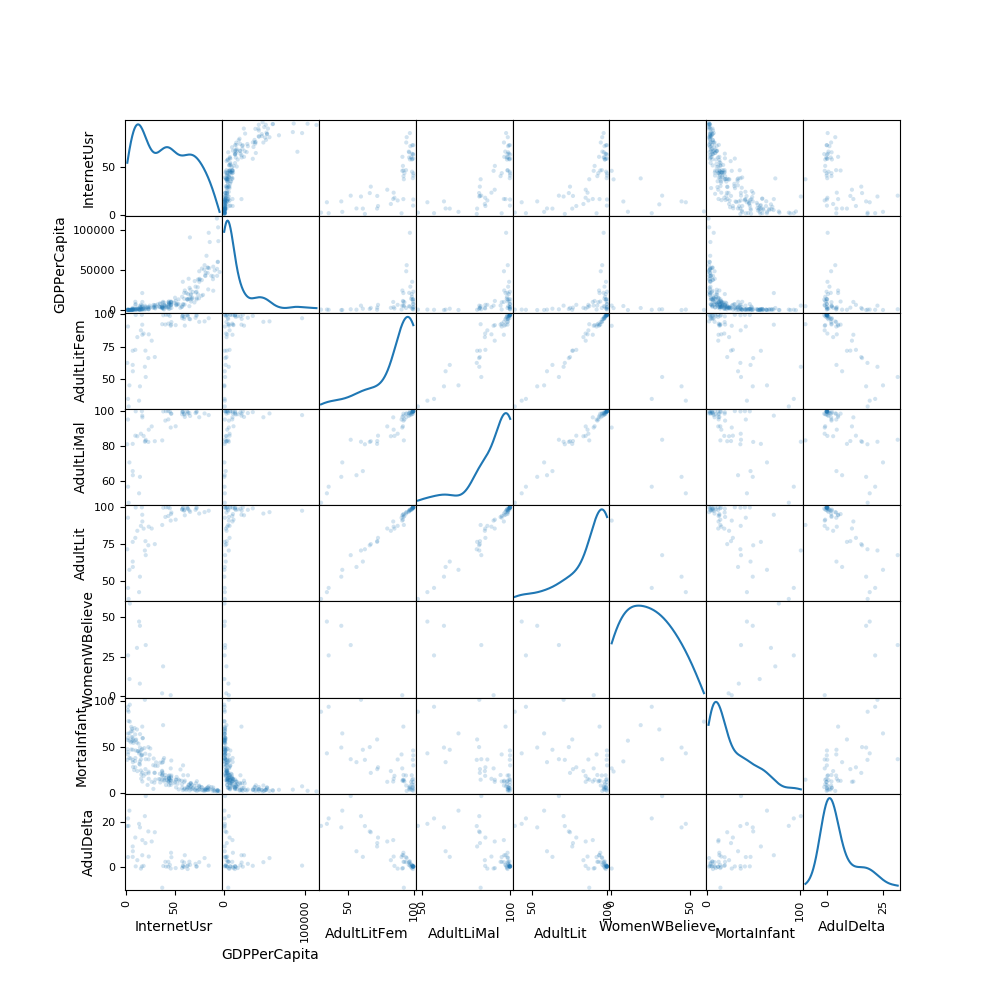

In [7]:

_=scatter_matrix(WordInds, alpha=0.2, figsize=(10, 10), diagonal='kde')


<IPython.core.display.Javascript object>


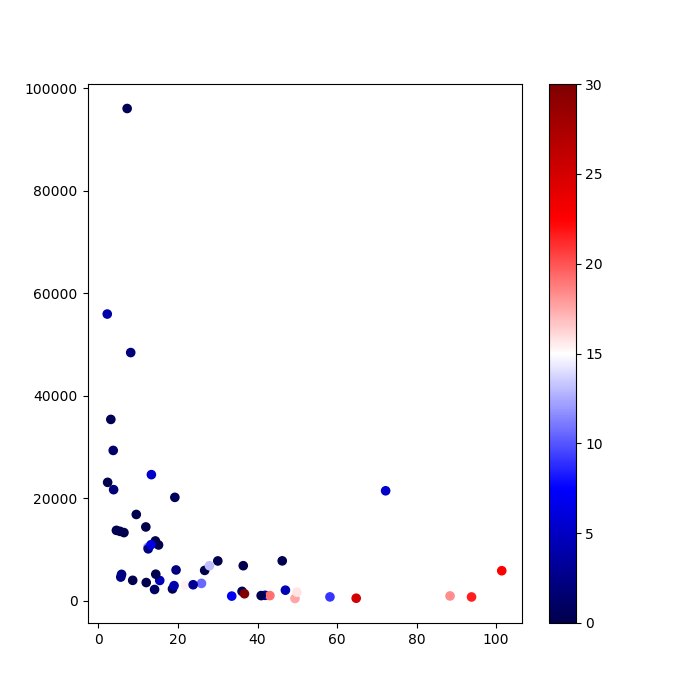

In [8]:
###Tenuto come esempio
plt.figure(figsize=(7,7))
cm = plt.cm.get_cmap('seismic')#'RdYlBu')
#xy = range(100)
sc = plt.scatter(WordInds['MortaInfant'],WordInds['GDPPerCapita'], c=WordInds['AdulDelta'], vmin=0, vmax=30, s=35, cmap=cm)
plt.colorbar(sc)
plt.show()



## The third DataSet
### Reading the Hapiness Dataset.
http://worldhappiness.report/ed/2017/


In [9]:
Happiness = pd.read_csv('/home/dio/Coursera_Python/dati/Happiness_2015.csv')
Happiness=Happiness[['Country','Happiness Score']]

In [10]:
Happiness.head()

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427


# Let's Merge the 3 datasets

In [11]:
#fix a couple of countries
Happiness['Country'][Happiness['Country']=='Russia']="Russian Federation"
Happiness['Country'][Happiness['Country']=='Macedonia']="Macedonia, FYR"

In [12]:
Global=pd.merge(WordInds,PISA, how='left', left_on='CountryName', right_on='Country')
Global=pd.merge(Global,Happiness, how='left', left_on='CountryName', right_on='Country')

## Let explore the new dataset.

In [13]:
Global.describe()

,InternetUsr,GDPPerCapita,AdultLitFem,AdultLiMal,AdultLit,WomenWBelieve,MortaInfant,AdulDelta,PISA_average_country,Delta_Male-Female,Happiness Score
count,235.000000,224.000000,55.000000,55.000000,55.000000,11.000000,225.000000,55.000000,68.000000,68.000000,141.000000
mean,42.487227,14540.896209,83.866710,89.608008,86.721662,25.372727,25.691393,5.741298,462.073939,-27.023591,5.425901
std,28.611781,20416.880320,19.724023,13.340427,16.384634,19.534026,22.672994,8.206702,49.971133,32.908980,1.152993
min,0.900000,239.869731,29.132099,47.424751,38.231941,0.400000,1.600000,-9.374947,339.026167,-125.093884,2.839000
25%,15.350000,1808.539282,72.421253,83.281536,78.146198,9.250000,7.200000,0.187572,420.650333,-46.395581,4.565000
50%,41.000000,6140.392008,92.218086,96.354187,94.426346,25.800000,17.400000,2.208168,475.415567,-19.742862,5.268000
75%,66.396896,16026.147033,98.588558,98.960949,98.614178,38.550000,38.100000,9.837627,502.843883,-3.231017,6.302000
max,96.546800,113726.638979,99.716820,99.902977,99.789360,58.900000,101.400000,31.648861,551.621533,25.580473,7.587000


In [14]:
Global=Global[['CountryName', 'InternetUsr', 'GDPPerCapita', 
          'AdultLit', 'WomenWBelieve', 'MortaInfant', 'AdulDelta',
        'PISA_average_country', 'Delta_Male-Female', 
       'Happiness Score']]
#Global.fillna(0, inplace=True)

<IPython.core.display.Javascript object>


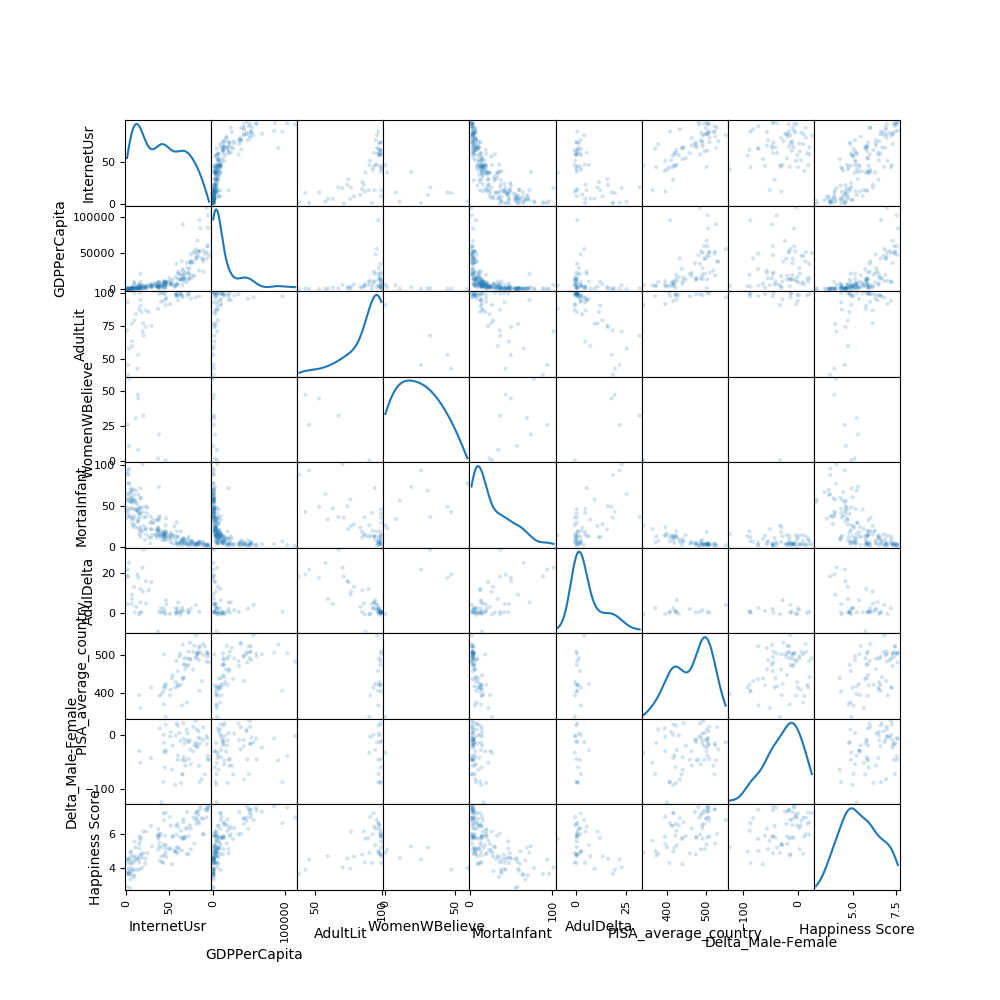

In [15]:
sm=scatter_matrix(Global, alpha=0.2, figsize=(10, 10), diagonal='kde')

<IPython.core.display.Javascript object>


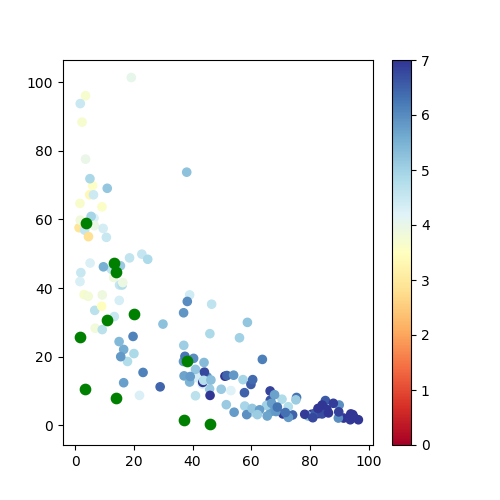

In [16]:
#just for test

plt.figure(figsize=(5,5))
cm = plt.cm.get_cmap('RdYlBu')
#xy = range(100)
sc = plt.scatter(Global['InternetUsr'],Global['MortaInfant'], c=Global['Happiness Score'], vmin=0, vmax=7, s=35, cmap=cm)
plt.colorbar(sc)
plt.scatter(Global['InternetUsr'],Global['WomenWBelieve'],c ='green',s=55)
plt.show()

<IPython.core.display.Javascript object>


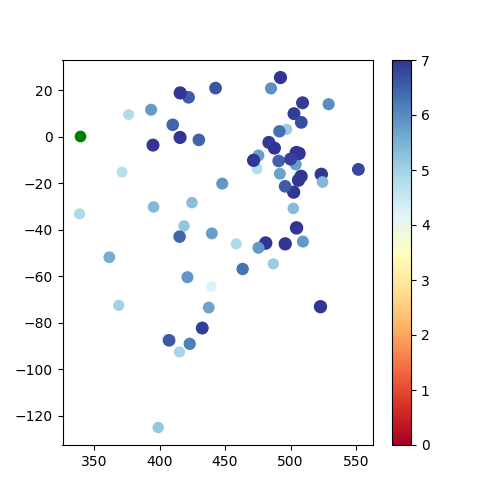

In [17]:
plt.figure(figsize=(5,5))
cm = plt.cm.get_cmap('RdYlBu')
#xy = range(100)

sc=plt.scatter(Global['PISA_average_country'],Global['Delta_Male-Female'], s=Global['Happiness Score']*10, vmin=0, vmax=7, c=Global['Happiness Score'], cmap=cm)
plt.scatter(Global['PISA_average_country'],Global['WomenWBelieve'],c ='green',s=55)

plt.colorbar(sc)
plt.show()


In [18]:

#['CountryName', 'InternetUsr', 'GDPPerCapita', 
#          'AdultLit', 'WomenWBelieve', 'MortaInfant', 'AdulDelta',
#        'PISA_average_country', 'Delta_Male-Female', 
#       'Happiness Score']
#fix the belive ....
Global1=Global[Global['WomenWBelieve']!=np.NaN]
Global1.describe()

,InternetUsr,GDPPerCapita,AdultLit,WomenWBelieve,MortaInfant,AdulDelta,PISA_average_country,Delta_Male-Female,Happiness Score
count,235.000000,224.000000,55.000000,11.000000,225.000000,55.000000,68.000000,68.000000,141.000000
mean,42.487227,14540.896209,86.721662,25.372727,25.691393,5.741298,462.073939,-27.023591,5.425901
std,28.611781,20416.880320,16.384634,19.534026,22.672994,8.206702,49.971133,32.908980,1.152993
min,0.900000,239.869731,38.231941,0.400000,1.600000,-9.374947,339.026167,-125.093884,2.839000
25%,15.350000,1808.539282,78.146198,9.250000,7.200000,0.187572,420.650333,-46.395581,4.565000
50%,41.000000,6140.392008,94.426346,25.800000,17.400000,2.208168,475.415567,-19.742862,5.268000
75%,66.396896,16026.147033,98.614178,38.550000,38.100000,9.837627,502.843883,-3.231017,6.302000
max,96.546800,113726.638979,99.789360,58.900000,101.400000,31.648861,551.621533,25.580473,7.587000


<IPython.core.display.Javascript object>


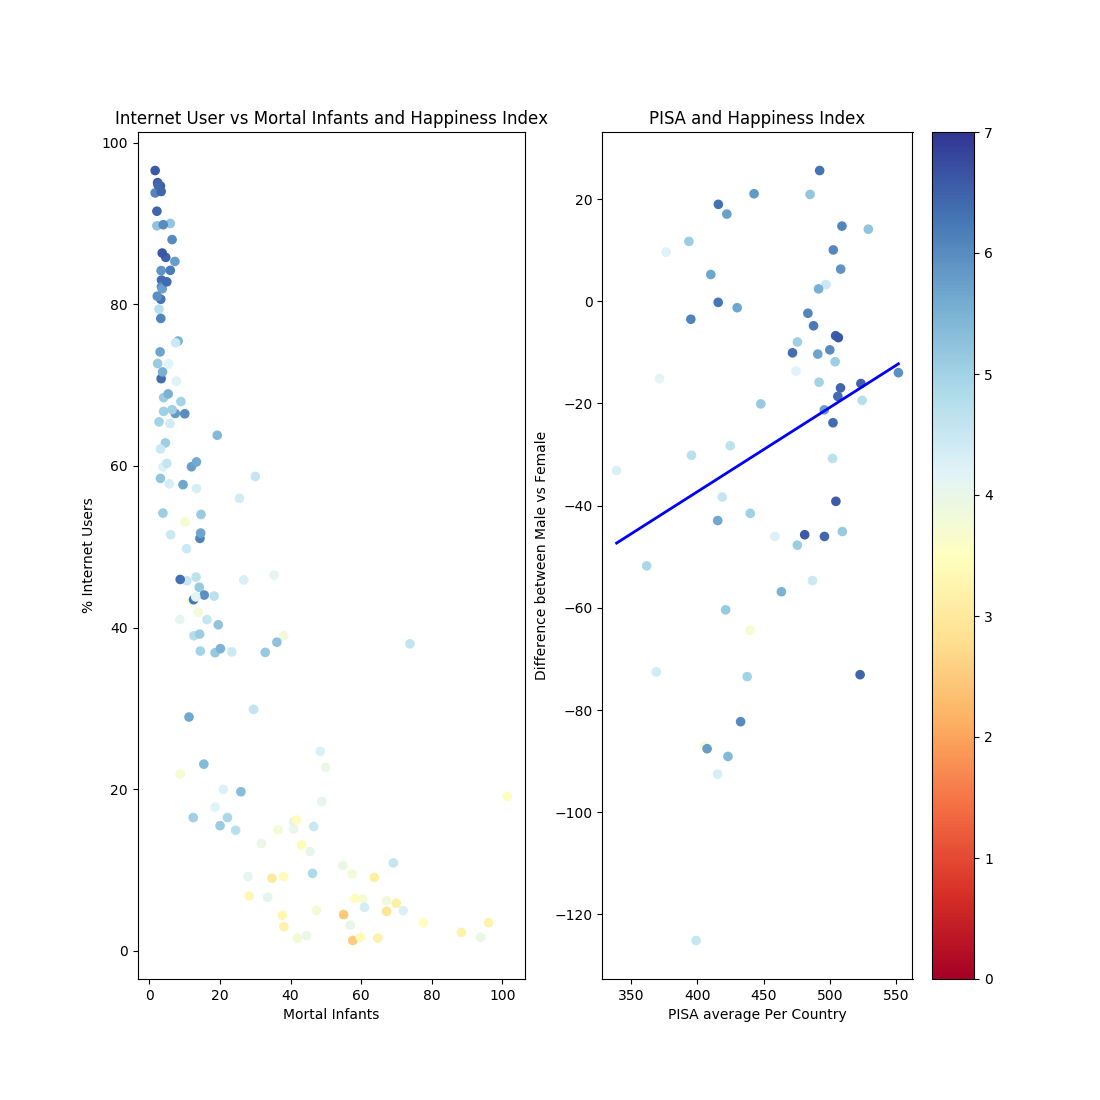

In [27]:
# Define regression parameter
GlobalB=Global.dropna()
a, b = np.polyfit(np.array(GlobalB['InternetUsr']),np.array(GlobalB['MortaInfant']) , deg=1)

f = lambda x: a * x + b

#cm = plt.cm.get_cmap('seismic')
cm = plt.cm.get_cmap('RdYlBu')

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(11,11), sharex=False, sharey=False)
ax1.scatter(Global['MortaInfant'],Global['InternetUsr'], c=Global['Happiness Score'],s=35, vmin=0, vmax=8,  cmap=cm)
ax1.set_xlabel('Mortal Infants')

#ax1.scatter(GlobalB['MortaInfant'],GlobalB['WomenWBelieve'], c='Black',s=35)

ax1.set_ylabel('% Internet Users')
ax1.set_title('Internet User vs Mortal Infants and Happiness Index')

#x = np.array([0,100])
#ax1.plot(f(x),x,lw=2, c="blue",label="Regression line")

ax2.scatter(Global['PISA_average_country'],Global['Delta_Male-Female'], c=Global['Happiness Score'], vmin=0, vmax=8, s=35, cmap=cm)
ax2.set_xlabel('PISA average Per Country')
ax2.set_ylabel('Difference between Male vs Female')
ax2.set_title('PISA and Happiness Index')

a, b = np.polyfit(np.array(PISA['PISA_average_country']),np.array(PISA['Delta_Male-Female']), deg=1)
f = lambda x: a * x + b

x = np.array([min(PISA['PISA_average_country']),max(PISA['PISA_average_country'])])
ax2.plot(x,f(x),lw=2, c="blue",label="Regression line")

fig.colorbar(sc)

